In [1]:
1. Stwórz dla domu maklerskiego graficzny dashboard, który pozwoli na podejmowanie decyzji o zakupie lub sprzedaży akcji Facebooka lub innych spółek. W tym celu wyświetl ceny akcji razem z średnią kroczącą z ostatnich 14 dni. Gdy aktualna cena spadnie poniżej średniej, to znak, że jesteśmy na górce i trzeba sprzedawać. Dodatkowo w dashboardzie umieść informacje o wolumenie sprzedaży, aby móc wykrywać nietypowe zdarzenia. Użyj w tym celu drugiej osi Y.

2. Notowania Facebooka ściągniesz stąd: https://www.nasdaq.com/market-activity/stocks/fb/historical Możesz także pobrać notowania innych interesujących Cię spółek. Te same dane znajdziesz także w pliku M08/data/fb.csv.

3. Zauważysz, że dane są posortowane od najnowszych do najstarszych. Jak odwrócisz tę kolejność? Poszukaj!

4. Wyceny akcji są poprzedzone znakiem dolara, np. `$80.20`. Napisz funkcję, która przyjmuje pojedynczy string, usuwa znak dolara i zwraca float'a. Użyj metody `.map()` na pojedynczej kolumnie, aby wyzwolić tę funkcję na każdym wierszu danych.

In [2]:
import pandas as pd

df = pd.read_csv(
    '/Users/ilo/Desktop/PYTHON/Praktyczny_Python/M08/data/fb.csv',
    parse_dates=['Date'],
)

print(df.de())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2357 non-null   datetime64[ns]
 1   Close/Last  2357 non-null   object        
 2   Volume      2357 non-null   int64         
 3   Open        2357 non-null   object        
 4   High        2357 non-null   object        
 5   Low         2357 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 110.6+ KB
None


In [14]:
import pandas as pd

df = pd.read_csv(
    '/Users/ilo/Desktop/PYTHON/Praktyczny_Python/M08/data/fb.csv',
    parse_dates=['Date'],
    index_col= 'Date',
    engine= 'python',
    thousands= ".",
)

df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-09-29,$339.61,14452240,$343.15,$345.23,$338.88
2021-09-28,$340.65,21710290,$347.97,$349.6,$338.92
2021-09-27,$353.58,15205840,$349.805,$355.15,$347.08
2021-09-24,$352.96,18801930,$343.239,$354.35,$342.37
2021-09-23,$345.96,21806260,$345.355,$349.67,$343
...,...,...,...,...,...
2012-05-24,$33.03,50208760,$32.95,$33.21,$31.77
2012-05-23,$32,73541150,$31.37,$32.5,$31.36
2012-05-22,$31,101667700,$32.61,$33.59,$30.94


In [27]:
import pandas as pd

df = pd.read_csv(
    '/Users/ilo/Desktop/PYTHON/Praktyczny_Python/M08/data/fb.csv',
    parse_dates=['Date'],
    index_col='Date',
    engine='python',
    thousands="."
).sort_values(
    'Date'
)

columns_to_clean = ['Open', 'High', 'Low', 'Close/Last']

for column in columns_to_clean:
    df[column] = df[column].str.replace('$', '').astype(float)

df['MA_14'] = df['Close/Last'].rolling(window=14).mean()

df                                

,Close/Last,Volume,Open,High,Low,MA_14
Date,,,,,,
2012-05-18,38.2318,579377500,42.000,45.00,38.00,NaN
2012-05-21,34.0300,167943600,36.530,36.66,33.00,NaN
2012-05-22,31.0000,101667700,32.610,33.59,30.94,NaN
2012-05-23,32.0000,73541150,31.370,32.50,31.36,NaN
2012-05-24,33.0300,50208760,32.950,33.21,31.77,NaN
...,...,...,...,...,...,...
2021-09-23,345.9600,21806260,345.355,349.67,343.00,368.556429
2021-09-24,352.9600,18801930,343.239,354.35,342.37,366.892143
2021-09-27,353.5800,15205840,349.805,355.15,347.08,364.849286


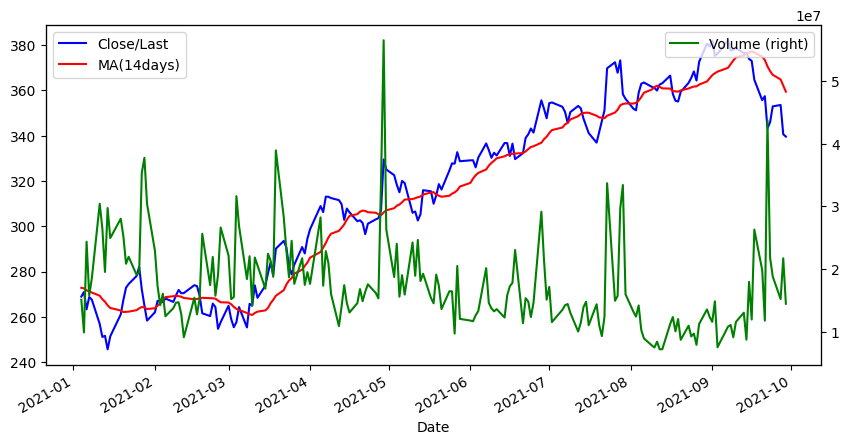